# Aspects of Borrower and Investment Profile that influence on Loan Rates
## by Suelen Fenali

## Investigation Overview

In this study the goal was to understand what characteristics of the borrower profile and the listing impacts the main rates, Borrower APR, Estimated Loss and Estimated Return.

## Dataset Overview

The dataset was provided by [Prosper](https://www.prosper.com) and contains 81 columns related to many different aspects of a loan. In order to narrow the analysis and focus on some insights, only 17 variables were used. Some of the features were available only after July 2009, so the data was cleaned up, and from the 113937 loan registries available, it was used 84853.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display, HTML

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('loan.csv')

## How the three main rates of a Loan relate among themselves?

When asking for money, the borrower may be concerned about the interest rate, while the lender would like to know how much is the estimated loss and return for that investment. This three features correlate in an interesting way. The loans with a better Estimated Return, also have a higher Borrower APR. However, for loans with a large Estimated Loss, even that the APR is great the return is very low, sometimes going below zero.

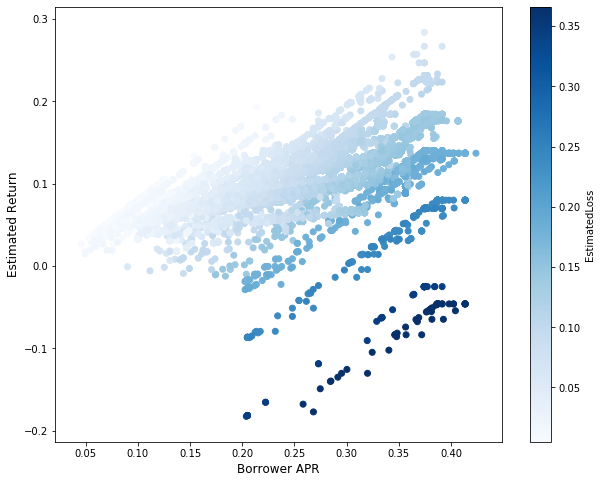

In [3]:
plt.figure(figsize = [10,8])
plt.scatter(data=loan, x='BorrowerAPR', y='EstimatedReturn', c='EstimatedLoss', alpha=1, cmap='Blues')
plt.colorbar(label='EstimatedLoss')
plt.xlabel('Borrower APR', fontsize=12);
plt.ylabel('Estimated Return', fontsize=12);

## Are the rates affected by the loan term and the Prosper Rating?

The ProsperRating that indicates the risk of the loan has a good correlation with Borrower APR and the EstimatedLoss. The Loans too short (12 months) or too long(60 months) don’t have ProsperRating of HR, which is the worst one. As the risk increases, the APR and the Loss grow as well. For 12 and 60 months the highest Estimated loss is around 15%, while for 36 months it reaches 35%. It occurs, because loans in this case have ratings of HR.

For all loan terms, except the 36 months loans that have HR rating, the EstimatedReturn increases as the ProsperRating gets worse, and the Borrower APR gets higher. So, it’s possible o to say that for loans with worst rating the investor may have a bigger return.

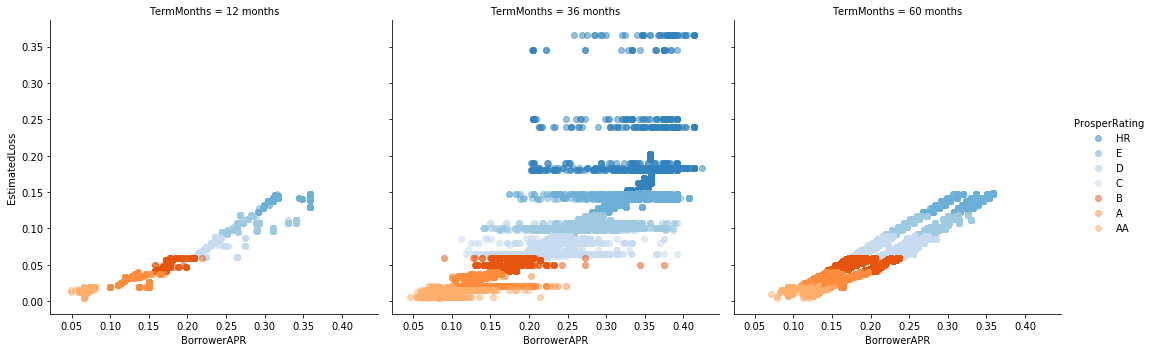

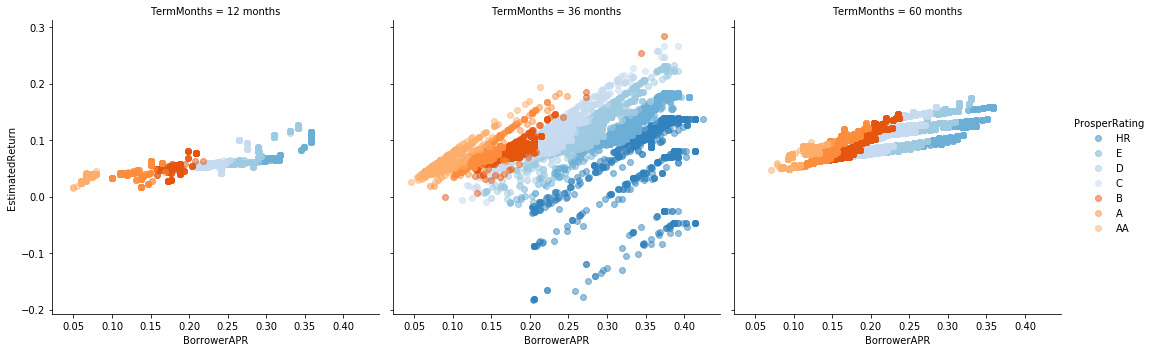

In [4]:
ratings = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ratings = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
loan['ProsperRating'] = loan['ProsperRating'].astype(ratings)

terms = ['12 months', '36 months', '60 months']
terms = pd.api.types.CategoricalDtype(ordered=True, categories=terms)
loan['TermMonths'] = loan['TermMonths'].astype(terms)

palette = sb.color_palette('tab20c', 7)  
g = sb.FacetGrid(data=loan, hue='ProsperRating', size=5, col='TermMonths', col_wrap=3, palette=palette);
g.map(plt.scatter, 'BorrowerAPR', 'EstimatedLoss', alpha=0.5);
g.add_legend();

palette = sb.color_palette('tab20c', 7)
g = sb.FacetGrid(data=loan, hue='ProsperRating', size=5, col='TermMonths', col_wrap=3, palette=palette);
g.map(plt.scatter, 'BorrowerAPR', 'EstimatedReturn', alpha=0.5);
g.add_legend();

## How the Prosper Rating and the Loan Amount are related to the APR and Return rate?

The folowing figure is the most interesting plot in this analysis. Some behaviours are possible to be understood from it. Firstly, the loan amount can be related to the Rating. Loans with smaller amounts are more risky to invest than those with larger amounts.

Also, loans with better rating tend to not present a negative EstimatedReturn, however they don’t have the best return as well. On the other hand, the loans with worst Rating present the best and the worst EstimatedReturn. The borrower APR, as I showed previously decreases as the ProsperRating is better. In this plot is very clear the ranges of APR for each ProsperRating.

Loans with Rating equal to C or D, are the best one to invest. They are not the most risky, and have a good Estimated Return rate.

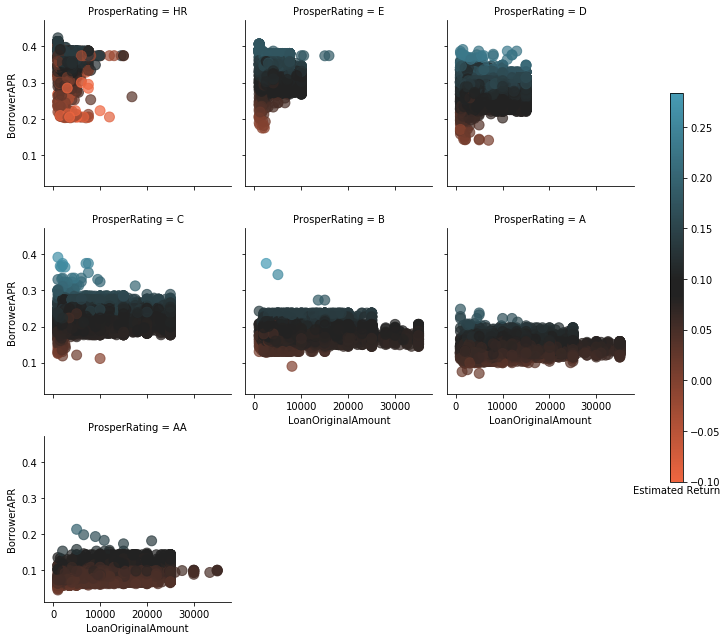

In [14]:
def scatter_plot(x, y, c, **kwargs):
    kwargs.pop('color')
    plt.scatter(x, y, c=c, **kwargs)
    
vmin, vmax = -0.1, loan.EstimatedReturn.max()
cmap = sb.diverging_palette(20, 220, n=7, s=80, l=60, as_cmap=True, center='dark')

g = sb.FacetGrid(data=loan, col='ProsperRating', size=3, col_wrap=3)
g.map(scatter_plot, 'LoanOriginalAmount', 'BorrowerAPR', 'EstimatedReturn',
      s=100, alpha=0.7, vmin=vmin, vmax=vmax, cmap=cmap);
cax = g.fig.add_axes([1.04, .25, .02, .6])

cax.set_xlabel('Estimated Return', )

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap);

# Draw the colorbar
g.fig.colorbar(points, cax=cax);

## How may the borower profile impact the Estimated Loss of a loan?

This last chart shows that some employment status don't have 12 months term loans. In general,  60 months term loans have a smaller EstimatedLoss independent of the employment status and the borrower delinquency situation. For every employment status, the Estimated Loss is bigger if the borrower have some current delinquency.

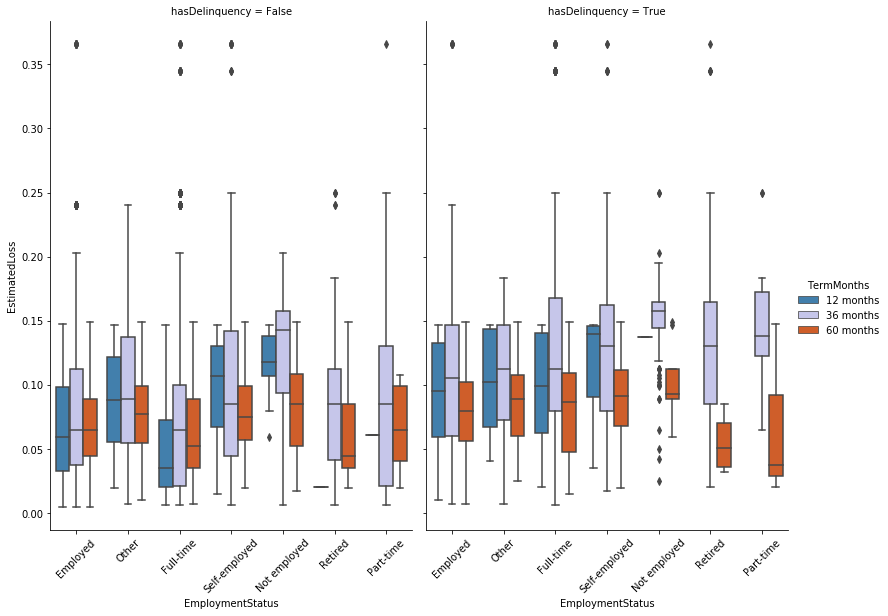

In [6]:
palette = ['#3182bd', '#c0c0f0', '#eb540e']
g = sb.catplot(data=loan, hue='TermMonths', y='EstimatedLoss', col='hasDelinquency', x='EmploymentStatus',
               kind='box', height=8, aspect=0.7, col_wrap=2, palette=palette)
g.set_xticklabels(rotation=45);

## Conclusion

This analysis showed that there are relationships among the borrower and investment profile and the rates for a loan. Understanding what may affect an interest rate and the estimated loss and return of a loan helps people to make good choices on whether or not to put their money. Remember to choose the medium risk investments to have a nice return with a smaller loss of capital.